# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [8]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
ap= pd.read_csv('../data/android_persistence_cpu.csv', sep=";")
ap.head()


,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

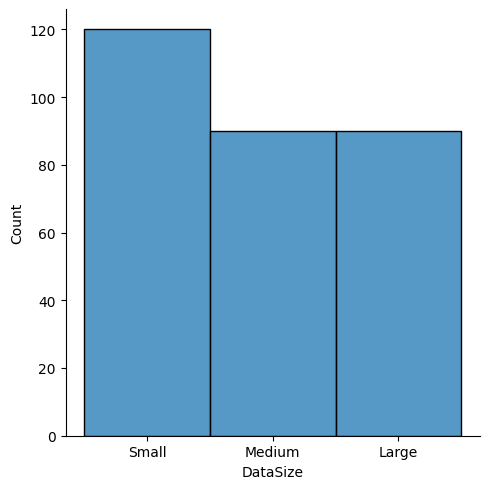

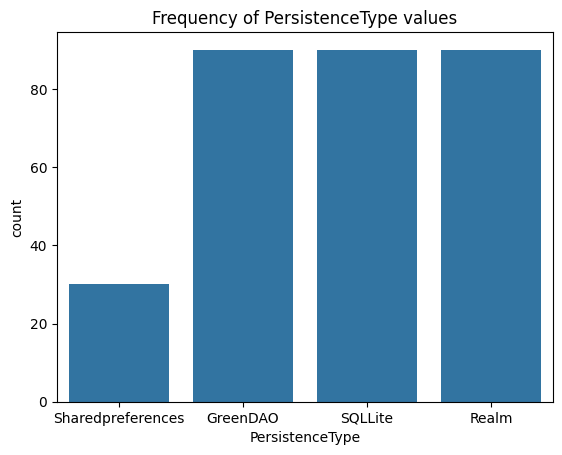

In [10]:
sns.displot(x =ap["DataSize"], bins = 11)
plt.show()
sns.countplot(data=ap, x='PersistenceType')
plt.title('Frequency of PersistenceType values')
plt.show()

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

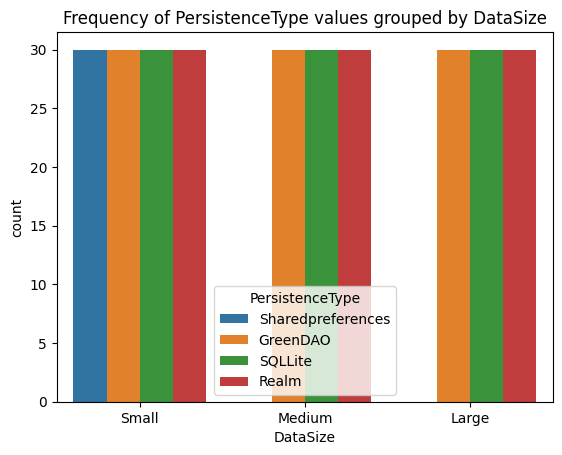

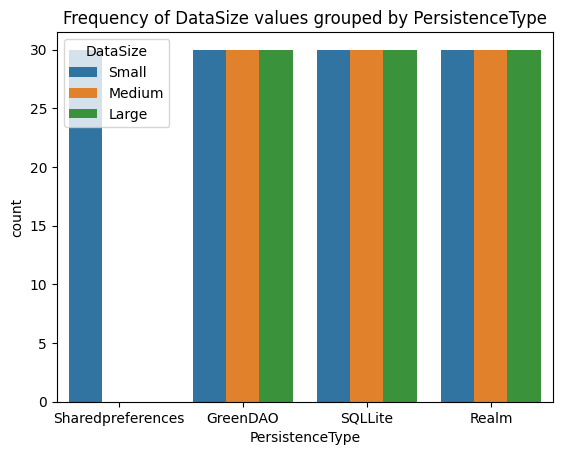

In [14]:
# How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!
sns.countplot(data=ap, x='DataSize', hue='PersistenceType')
plt.title('Frequency of PersistenceType values grouped by DataSize')
plt.show()
sns.countplot(data=ap, x='PersistenceType', hue='DataSize')
plt.title('Frequency of DataSize values grouped by PersistenceType')
plt.show()

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

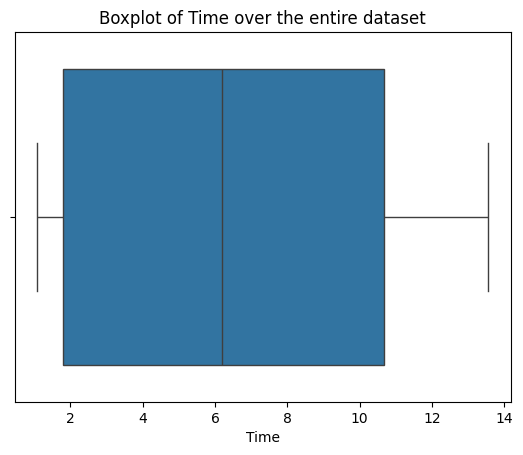

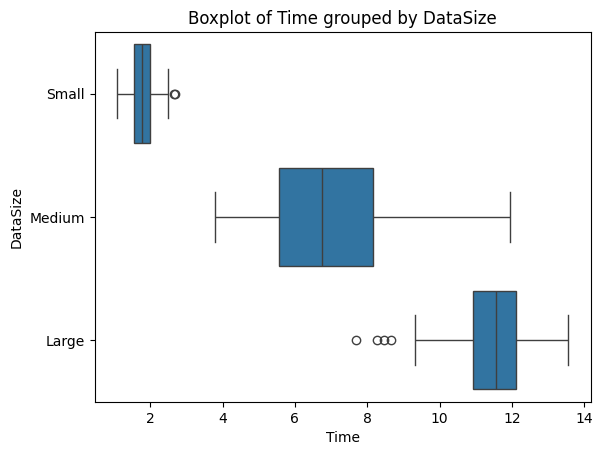

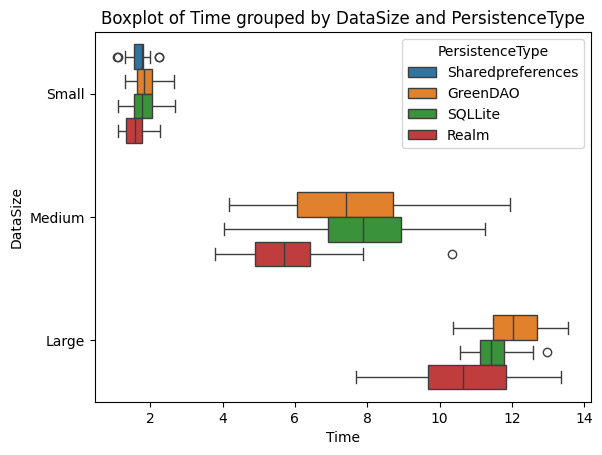

In [21]:
sns.boxplot(data=ap, x='Time')
plt.title('Boxplot of Time over the entire dataset')
plt.show()

sns.boxplot(data=ap, x='Time', y='DataSize')
plt.title('Boxplot of Time grouped by DataSize')
plt.show()

sns.boxplot(data=ap, x='Time', y='DataSize', hue='PersistenceType')
plt.title('Boxplot of Time grouped by DataSize and PersistenceType')
plt.show()

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

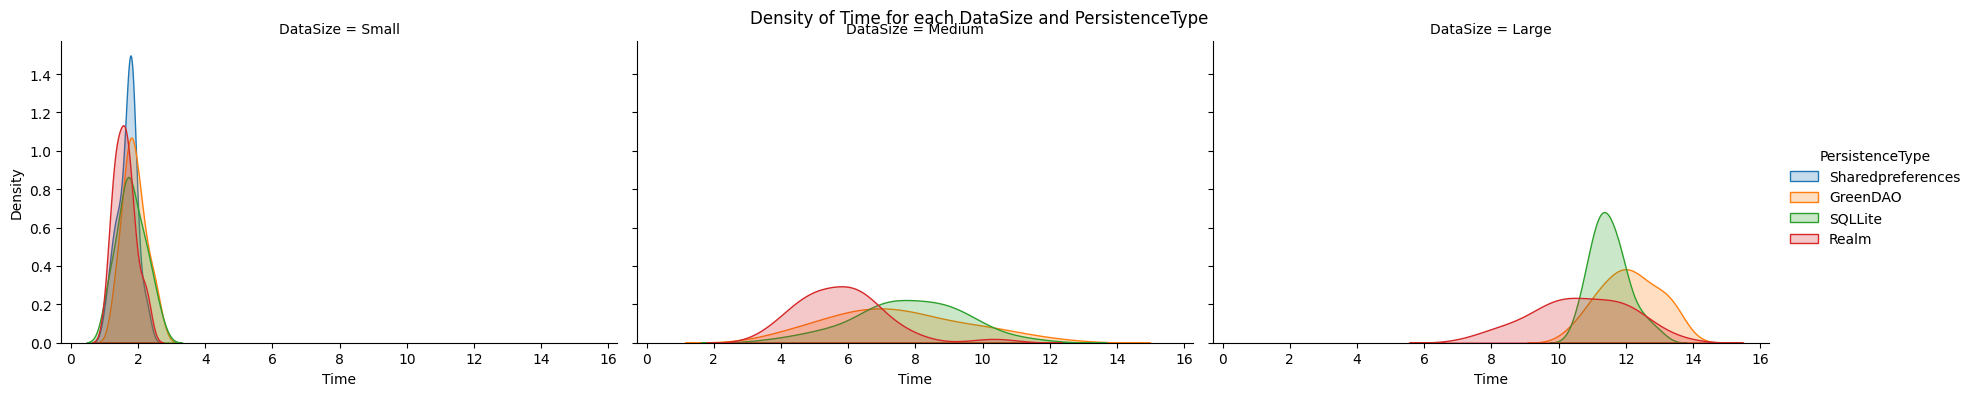

In [ ]:
g = sns.FacetGrid(ap, col='DataSize', hue='PersistenceType', height=4, aspect=1.5)
g.map(sns.kdeplot, 'Time', fill=True)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Density of Time for each DataSize and PersistenceType')
plt.show()

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [41]:
result = ap['Time'].agg(['mean', 'std']).round(3)
print(result)
print("------------")
result1 = ap.groupby('DataSize')['Time'].agg(['mean', 'std']).round(3)
print(result1)
print("------------")
result2 = ap.groupby('PersistenceType')['Time'].agg(['mean', 'std']).round(3)
print(result2)
print("------------")
result3 = ap.groupby(['PersistenceType','DataSize'])['Time'].agg(['mean', 'std']).round(3)
print(result3)



mean    6.231
std     4.230
Name: Time, dtype: float64
------------
            mean    std
DataSize               
Large     11.426  1.164
Medium     7.022  1.864
Small      1.741  0.359
------------
                    mean    std
PersistenceType                
GreenDAO           7.153  4.386
Realm              6.023  3.884
SQLLite            7.036  4.146
Sharedpreferences  1.674  0.285
------------
                              mean    std
PersistenceType   DataSize               
GreenDAO          Large     12.110  0.868
                  Medium     7.454  2.007
                  Small      1.894  0.348
Realm             Large     10.652  1.406
                  Medium     5.818  1.331
                  Small      1.599  0.315
SQLLite           Large     11.515  0.559
                  Medium     7.794  1.599
                  Small      1.799  0.416
Sharedpreferences Small      1.674  0.285


## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
